In [1]:
%load_ext autoreload
%autoreload 2

import compression as C
import backports.lzma as lzma
import numpy as np

from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
%matplotlib inline

# ac3 = C.Util.load_data('ac3', -1)

# maybe this can be tuned
LZMA_filters = [{"id": lzma.FILTER_LZMA1, "preset": lzma.PRESET_EXTREME}]


/home/d/nolearn/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
ac3 = C.Util.load_data('ac3', -1, gold=False)
ac3_gold = C.Util.load_data('ac3', -1, gold=True)

In [10]:
cyl = C.Util.load_data('cylinder', 1, gold=False)
cyl_gold = C.Util.load_data('cylinder', 1, gold=True)

In [12]:
def seg_to_color(slice):
   colors = np.zeros(slice.shape+(3,),dtype=np.uint8)
   colors[:,:,0] = np.mod(107*slice[:,:],700).astype(np.uint8)
   colors[:,:,1] = np.mod(509*slice[:,:],900).astype(np.uint8)
   colors[:,:,2] = np.mod(200*slice[:,:],777).astype(np.uint8)
   return colors

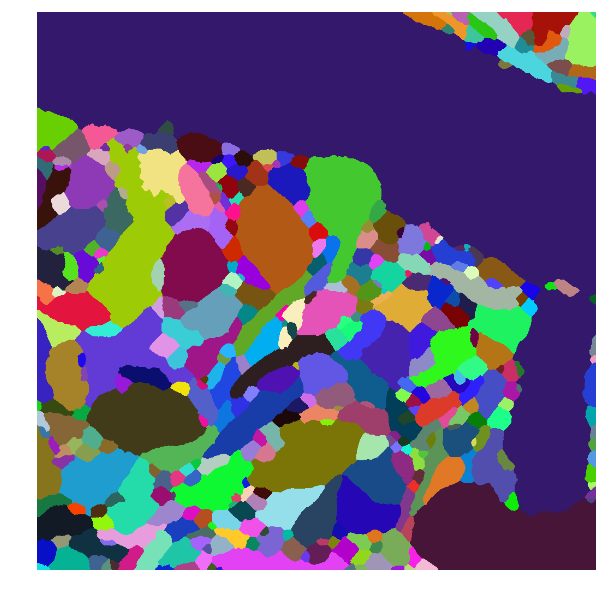

In [13]:
plt.figure(figsize=(10,10))
plt.axis('off')

imshow(seg_to_color(ac3[0]))
plt.savefig('/tmp/ac3.png')

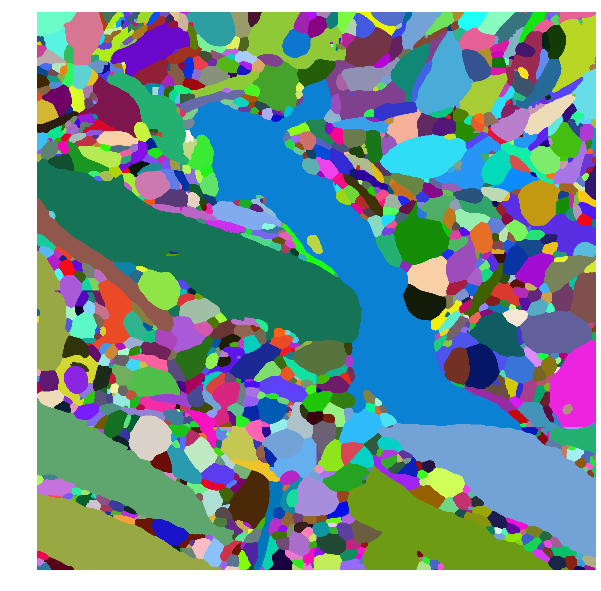

In [14]:
plt.figure(figsize=(10,10))
plt.axis('off')

imshow(seg_to_color(cyl[0]))
plt.savefig('/tmp/cyl.png')

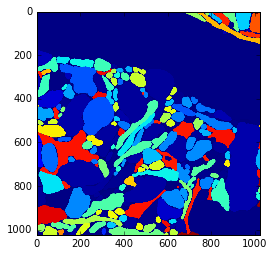

In [10]:
imshow(ac3_gold[0])

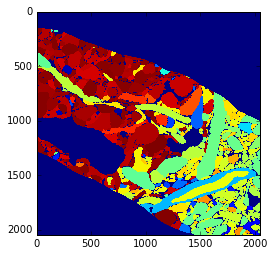

In [14]:
imshow(cyl_gold[100])

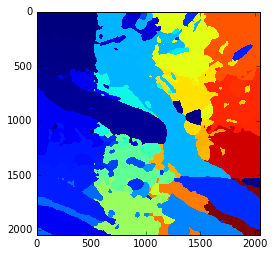

In [13]:
imshow(cyl[0])

In [23]:
a=C.Util.benchmark(C.LZMA, C.RLE, ac3[60], N=1)

LZMA: 552.027375625
Compression Method: LZMA
Encoding Method: RLE
Input Size: 8.388608 MB
Output Size: 0.015196 MB
Ratio: 552.027375625
Compression Speed [MB/s]: 31.347333125
Decompression Speed [MB/s]: 4.94005918338
Encoding Speed [MB/s]: 172.377773423
Decoding Speed [MB/s]: 0.641129868166


In [24]:
a=C.Util.benchmark(C.LZMA, C.RLE, ac3_gold[60], N=1)

LZMA: 482.214762014
Compression Method: LZMA
Encoding Method: RLE
Input Size: 8.388608 MB
Output Size: 0.017396 MB
Ratio: 482.214762014
Compression Speed [MB/s]: 23.569791602
Decompression Speed [MB/s]: 4.99583104307
Encoding Speed [MB/s]: 159.758313115
Decoding Speed [MB/s]: 0.584877976


In [25]:
a=C.Util.benchmark(C.LZMA, C.RLE, cyl[100], N=1)

LZMA: 761.90808356
Compression Method: LZMA
Encoding Method: RLE
Input Size: 33.554432 MB
Output Size: 0.04404 MB
Ratio: 761.90808356
Compression Speed [MB/s]: 40.0418487622
Decompression Speed [MB/s]: 5.1818427402
Encoding Speed [MB/s]: 256.860544456
Decoding Speed [MB/s]: 0.180017433036


In [ ]:
#
# cylinder full stack
#

In [ ]:
a=C.Util.benchmark(C.NG, C.NE, cyl_gold, N=10)

In [ ]:
a=C.Util.benchmark(C.NG, C.NE, cyl, N=10)

In [ ]:
a=C.Util.benchmark(C.NG, C.NE, ac3_gold, N=10)

In [3]:
a=C.Util.benchmark(C.NG, C.NE, ac3[0:3], N=1)

LoweringError: Caused By:
Traceback (most recent call last):
  File "/home/d/nolearn/local/lib/python2.7/site-packages/numba/compiler.py", line 227, in run
    stage()
  File "/home/d/nolearn/local/lib/python2.7/site-packages/numba/compiler.py", line 415, in stage_objectmode_frontend
    cres = self.frontend_looplift()
  File "/home/d/nolearn/local/lib/python2.7/site-packages/numba/compiler.py", line 406, in frontend_looplift
    lifted=tuple(loops), lifted_from=None)
  File "/home/d/nolearn/local/lib/python2.7/site-packages/numba/compiler.py", line 698, in compile_ir
    lifted_from=lifted_from)
  File "/home/d/nolearn/local/lib/python2.7/site-packages/numba/compiler.py", line 356, in compile_ir
    return self._compile_ir()
  File "/home/d/nolearn/local/lib/python2.7/site-packages/numba/compiler.py", line 656, in _compile_ir
    return self._compile_core()
  File "/home/d/nolearn/local/lib/python2.7/site-packages/numba/compiler.py", line 636, in _compile_core
    res = pm.run(self.status)
  File "/home/d/nolearn/local/lib/python2.7/site-packages/numba/compiler.py", line 235, in run
    raise patched_exception
LoweringError: Caused By:
Traceback (most recent call last):
  File "/home/d/nolearn/local/lib/python2.7/site-packages/numba/compiler.py", line 227, in run
    stage()
  File "/home/d/nolearn/local/lib/python2.7/site-packages/numba/compiler.py", line 554, in stage_objectmode_backend
    self._backend(lowerfn, objectmode=True)
  File "/home/d/nolearn/local/lib/python2.7/site-packages/numba/compiler.py", line 531, in _backend
    lowered = lowerfn()
  File "/home/d/nolearn/local/lib/python2.7/site-packages/numba/compiler.py", line 505, in backend_object_mode
    self.flags)
  File "/home/d/nolearn/local/lib/python2.7/site-packages/numba/compiler.py", line 826, in py_lowering_stage
    lower.lower()
  File "/home/d/nolearn/local/lib/python2.7/site-packages/numba/lowering.py", line 126, in lower
    self.lower_normal_function(self.fndesc)
  File "/home/d/nolearn/local/lib/python2.7/site-packages/numba/lowering.py", line 161, in lower_normal_function
    entry_block_tail = self.lower_function_body()
  File "/home/d/nolearn/local/lib/python2.7/site-packages/numba/lowering.py", line 186, in lower_function_body
    self.lower_block(block)
  File "/home/d/nolearn/local/lib/python2.7/site-packages/numba/lowering.py", line 201, in lower_block
    self.lower_inst(inst)
  File "/usr/lib/python2.7/contextlib.py", line 35, in __exit__
    self.gen.throw(type, value, traceback)
  File "/home/d/nolearn/local/lib/python2.7/site-packages/numba/errors.py", line 249, in new_error_context
    six.reraise(type(newerr), newerr, sys.exc_info()[2])
  File "/home/d/nolearn/local/lib/python2.7/site-packages/numba/errors.py", line 243, in new_error_context
    yield
  File "/home/d/nolearn/local/lib/python2.7/site-packages/numba/lowering.py", line 201, in lower_block
    self.lower_inst(inst)
  File "/home/d/nolearn/local/lib/python2.7/site-packages/numba/objmode.py", line 65, in lower_inst
    value = self.lower_assign(inst)
  File "/home/d/nolearn/local/lib/python2.7/site-packages/numba/objmode.py", line 159, in lower_assign
    return self.lower_expr(value)
  File "/home/d/nolearn/local/lib/python2.7/site-packages/numba/objmode.py", line 242, in lower_expr
    argvals = [self.loadvar(a.name) for a in expr.args]
  File "/home/d/nolearn/local/lib/python2.7/site-packages/numba/objmode.py", line 520, in loadvar
    assert name in self._live_vars, name
LoweringError: bits_needed
File "compression/neuroglancer.py", line 47
[1] During: lowering "$520 = call $519(ax, ay, az, bits_needed, bx, by, bz, data, encoded_values, gx, gy, gz, index.1, lookup_table, nbits, nelements, nuint64_output, table_offsets, values_offsets)" at compression/neuroglancer.py (47)

Failed at object (object mode backend)
bits_needed
File "compression/neuroglancer.py", line 47
[1] During: lowering "$520 = call $519(ax, ay, az, bits_needed, bx, by, bz, data, encoded_values, gx, gy, gz, index.1, lookup_table, nbits, nelements, nuint64_output, table_offsets, values_offsets)" at compression/neuroglancer.py (47)

Failed at object (object mode frontend)
Caused By:
Traceback (most recent call last):
  File "/home/d/nolearn/local/lib/python2.7/site-packages/numba/compiler.py", line 227, in run
    stage()
  File "/home/d/nolearn/local/lib/python2.7/site-packages/numba/compiler.py", line 554, in stage_objectmode_backend
    self._backend(lowerfn, objectmode=True)
  File "/home/d/nolearn/local/lib/python2.7/site-packages/numba/compiler.py", line 531, in _backend
    lowered = lowerfn()
  File "/home/d/nolearn/local/lib/python2.7/site-packages/numba/compiler.py", line 505, in backend_object_mode
    self.flags)
  File "/home/d/nolearn/local/lib/python2.7/site-packages/numba/compiler.py", line 826, in py_lowering_stage
    lower.lower()
  File "/home/d/nolearn/local/lib/python2.7/site-packages/numba/lowering.py", line 126, in lower
    self.lower_normal_function(self.fndesc)
  File "/home/d/nolearn/local/lib/python2.7/site-packages/numba/lowering.py", line 161, in lower_normal_function
    entry_block_tail = self.lower_function_body()
  File "/home/d/nolearn/local/lib/python2.7/site-packages/numba/lowering.py", line 186, in lower_function_body
    self.lower_block(block)
  File "/home/d/nolearn/local/lib/python2.7/site-packages/numba/lowering.py", line 201, in lower_block
    self.lower_inst(inst)
  File "/usr/lib/python2.7/contextlib.py", line 35, in __exit__
    self.gen.throw(type, value, traceback)
  File "/home/d/nolearn/local/lib/python2.7/site-packages/numba/errors.py", line 249, in new_error_context
    six.reraise(type(newerr), newerr, sys.exc_info()[2])
  File "/home/d/nolearn/local/lib/python2.7/site-packages/numba/errors.py", line 243, in new_error_context
    yield
  File "/home/d/nolearn/local/lib/python2.7/site-packages/numba/lowering.py", line 201, in lower_block
    self.lower_inst(inst)
  File "/home/d/nolearn/local/lib/python2.7/site-packages/numba/objmode.py", line 65, in lower_inst
    value = self.lower_assign(inst)
  File "/home/d/nolearn/local/lib/python2.7/site-packages/numba/objmode.py", line 159, in lower_assign
    return self.lower_expr(value)
  File "/home/d/nolearn/local/lib/python2.7/site-packages/numba/objmode.py", line 242, in lower_expr
    argvals = [self.loadvar(a.name) for a in expr.args]
  File "/home/d/nolearn/local/lib/python2.7/site-packages/numba/objmode.py", line 520, in loadvar
    assert name in self._live_vars, name
LoweringError: bits_needed
File "compression/neuroglancer.py", line 47
[1] During: lowering "$520 = call $519(ax, ay, az, bits_needed, bx, by, bz, data, encoded_values, gx, gy, gz, index.1, lookup_table, nbits, nelements, nuint64_output, table_offsets, values_offsets)" at compression/neuroglancer.py (47)

Failed at object (object mode backend)
bits_needed
File "compression/neuroglancer.py", line 47
[1] During: lowering "$520 = call $519(ax, ay, az, bits_needed, bx, by, bz, data, encoded_values, gx, gy, gz, index.1, lookup_table, nbits, nelements, nuint64_output, table_offsets, values_offsets)" at compression/neuroglancer.py (47)

LZMA: 761.90808356


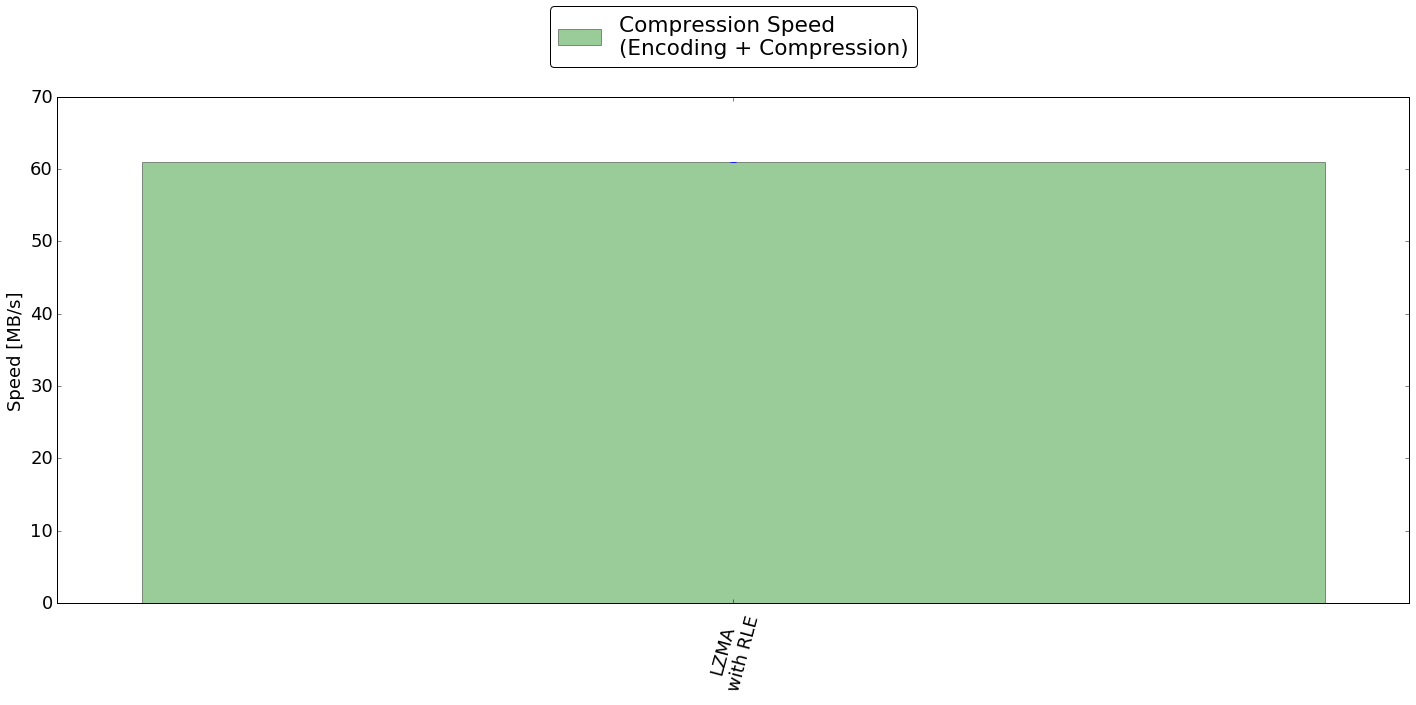

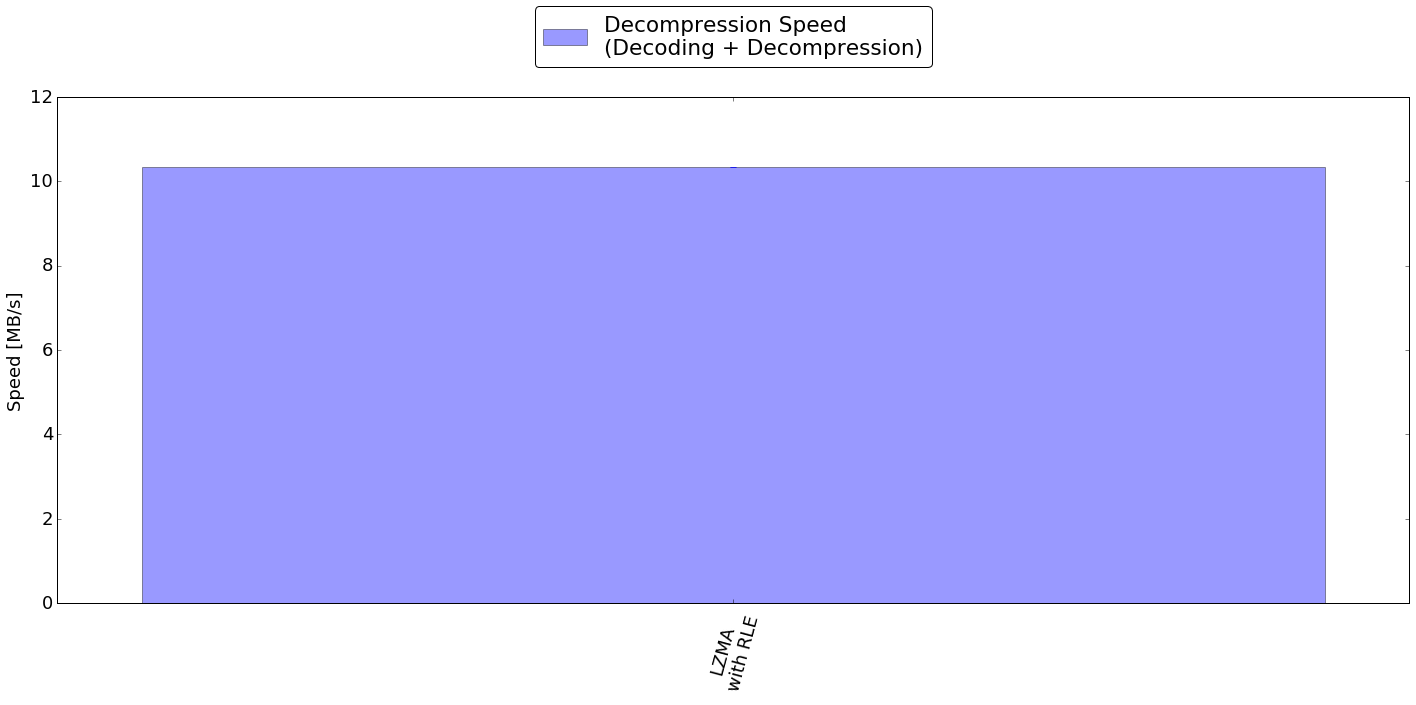

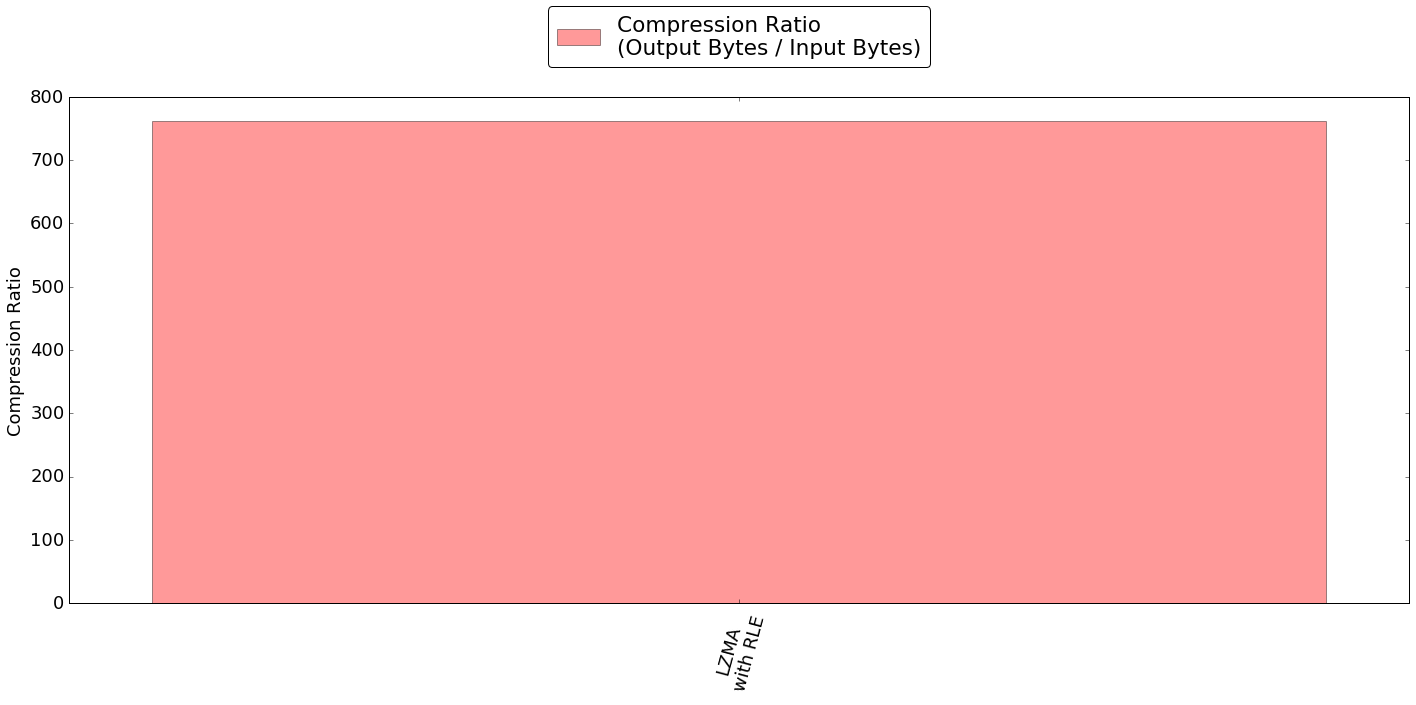

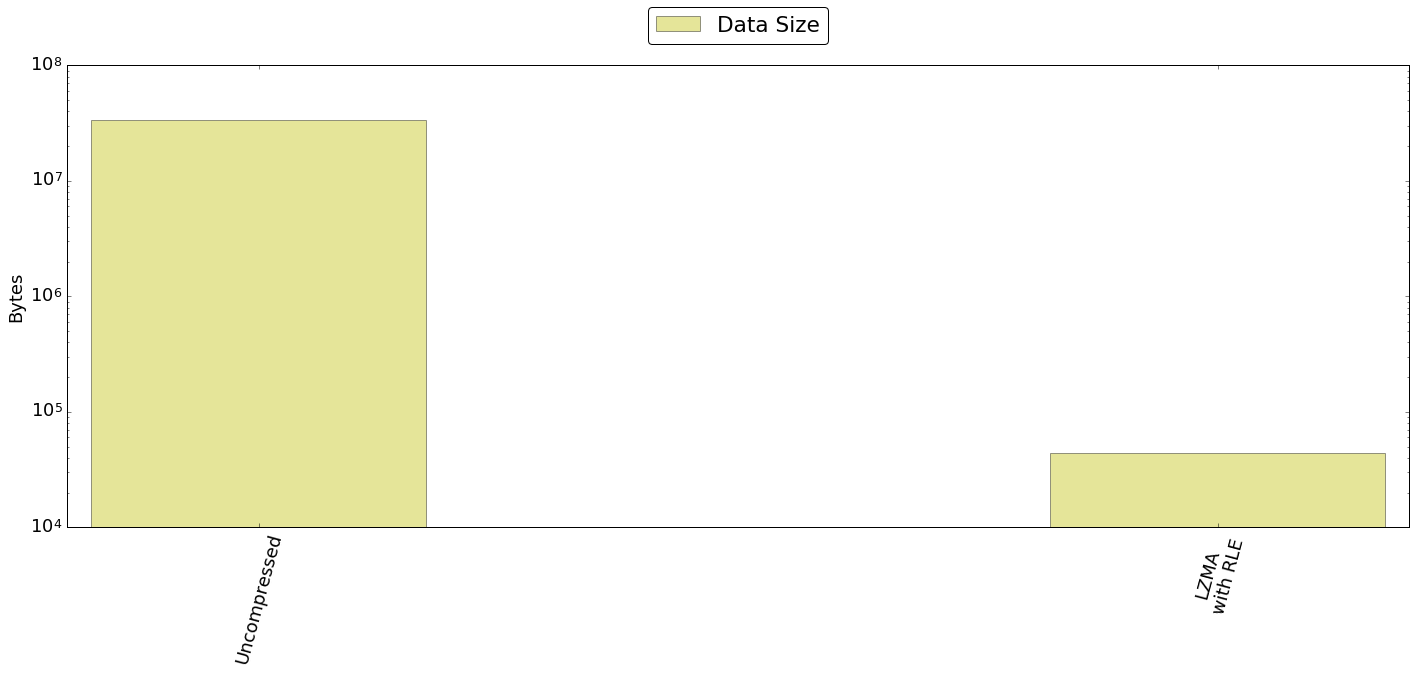

In [19]:
com_alg = [C.LZMA]
enc_alg = [C.RLE]
C.Util.run_experiments(data=cyl[100], N=1, com_alg=com_alg, enc_alg=enc_alg)

LZMA: 689.172527111


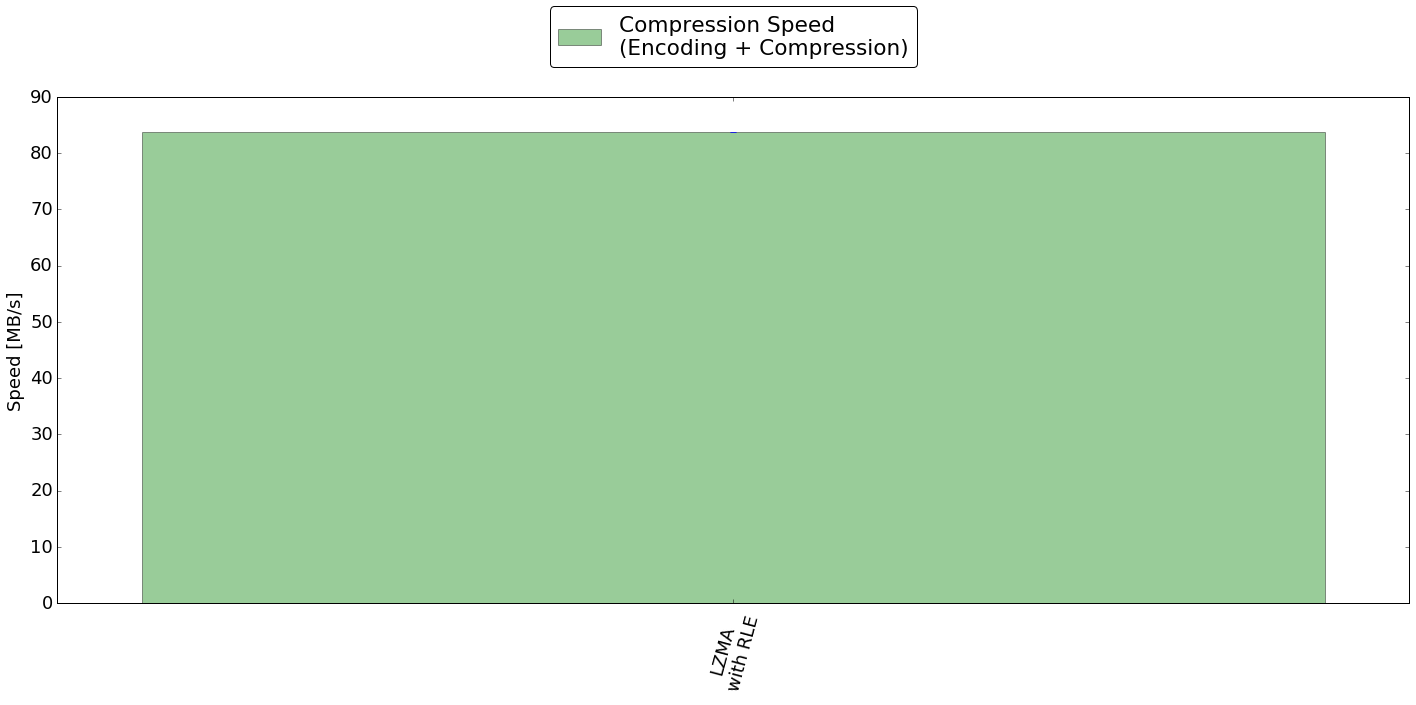

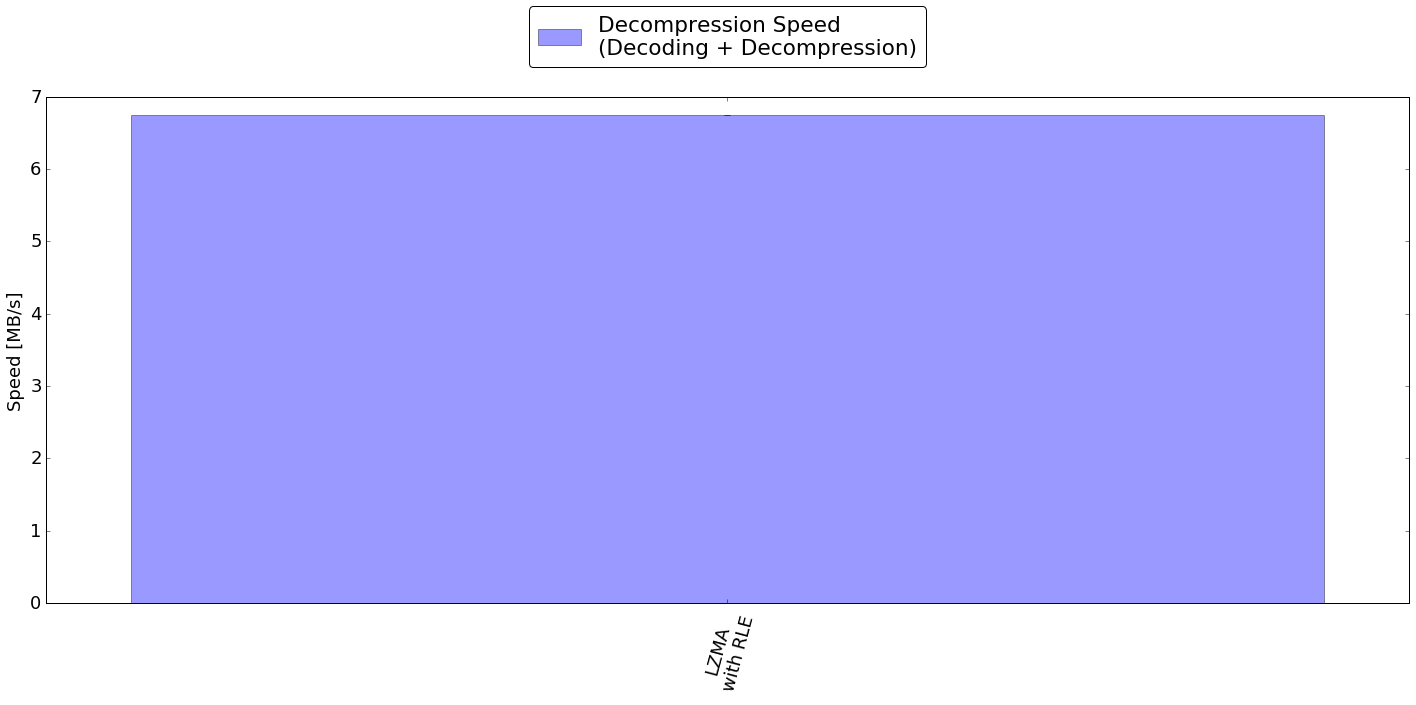

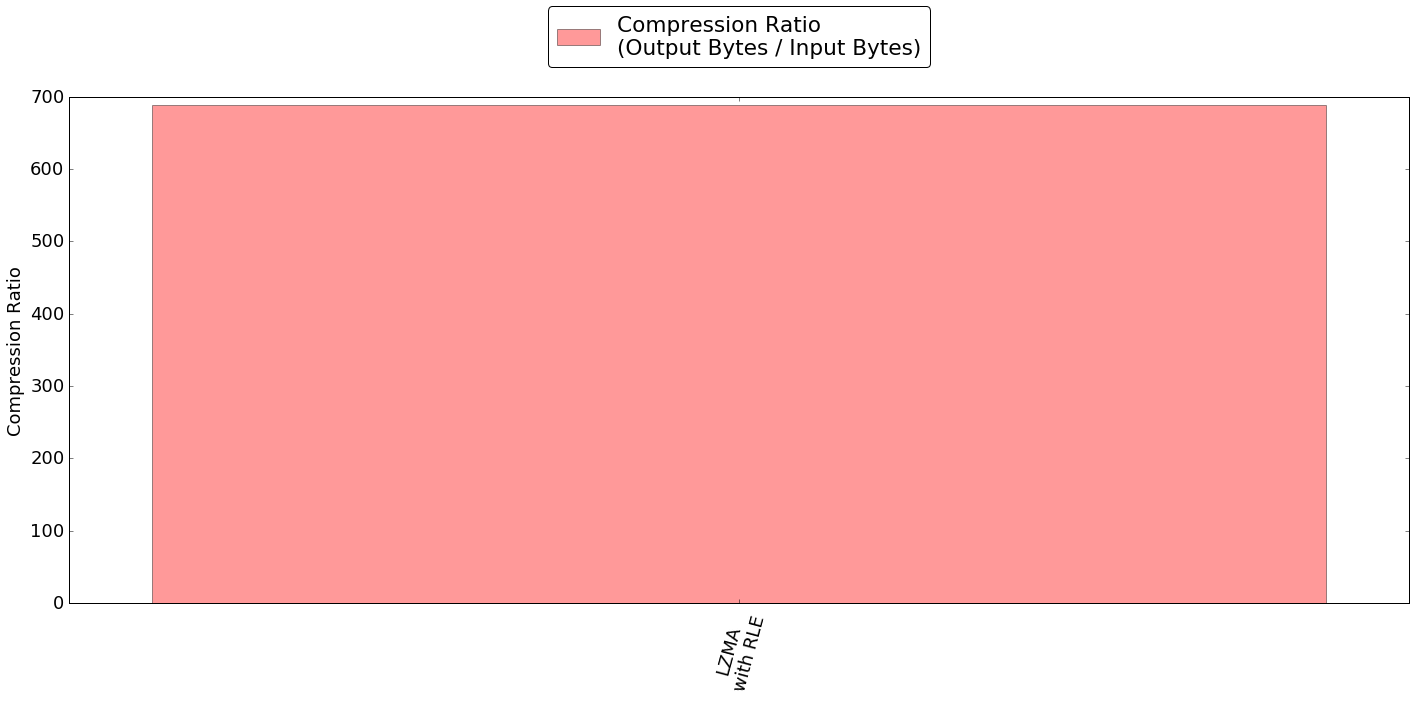

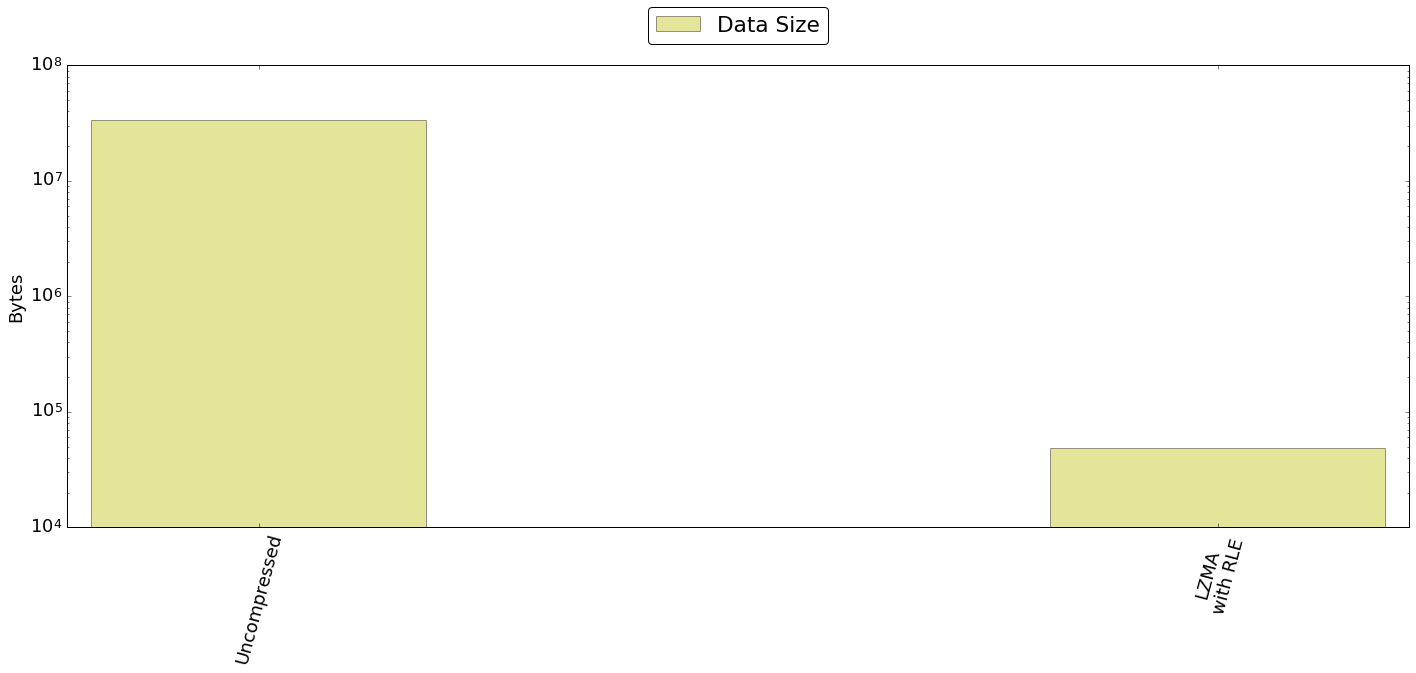

In [20]:
com_alg = [C.LZMA]
enc_alg = [C.RLE]
C.Util.run_experiments(data=cyl_gold[100], N=1, com_alg=com_alg, enc_alg=enc_alg)